## Введение 

Проект **Аналитика данных с целью сегментации клиентов банка**.

### Описание проекта


**Контекст**


Банк «Метанпром» сделал заказ на аналитику данных с целью сегментации своих клиентов.

Менеджер банка  хотят сформулировать сегменты клиентов и дать рекомендацию относительно конкретных продуктов, которые могли бы заинтересовать разные сегменты клиентов.


Нам доступен датасет с информацией о 10 000 клиентах.  банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

### Описание данных

**Описание данных**:


Файл `bank_dataset.csv`:
       
- `userid` — уникальный id пользователя;
- `score` — баллы кредитного скоринга;
- `City` — название города;
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет. 

### Декомпозиция проекта

**Цель проекта:** Сегментировать клиентов банка для формулировки целевого маркетингового предложения продукта и рекомендаций по улучшению обслуживания клиентов.




**Шаг 1. Загрузка библиотек и изучение общей информации**

Этот шаг включает в себя импорт необходимых библиотек и загрузку данных о клиентов банка для подготовки к дальнейшему анализу.

Путь к файлу: `datasets/bank_dataset.csv.` 

Формулировка краткого вывода.

**Шаг 2. Предобработка данных**

Этот этап включает в себя выявление дубликатов, очистку и преобразование данных о клиентах, выявление закономерностей в пропусках (если есть), обработку пропущенных значений и подготовку данных для исследовательского анализа данных и сегментации.

Вывод по разделу.



**Шаг 3. Исследовательский анализ данных**

Этот этап включает в себя визуализацию и обобщение данных о клиентах для выявления закономерностей и тенденций, а также выбор соответствующих функций для сегментации клиентов.

По завершению этапа  - сбор наблюдений по вопросам выше в один общий вывод.


**Шаг 4. Сегментация клиентов банка**

Этот шаг включает в себя сегментацию клиентов банка в основные 4 или менее категорий на основе количества используемых продуктов и уровню оттока. 
Также необходимо оценить степень схожести разных категорий и провести окончательную границу между категориями. 

Завершить этап формулировкой рекомендаций для маркетингового предложения банковского продукиа на основе разных сегментов клиентов банка. 


**Шаг 5. Статистическое исследование данных**

На этом шаге предполагается применение статистических методов для дальнейшего изучения и проверки сегментов, полученных на этапе сегментации.
Проверка гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
Формулировка и проверка второй статистической гипотезы относительно представленных данных (предварительно - есть ли различия баланса тех, кто уходит из банка и тех, кто остаётся).

Сформулировать выводы по разделу.


**Шаг 6. Подготовка презентации**

Построение дашборда.
Формулировка окончательных выводов и рекомендаций. Подготовка презентации исследования для менеджера банка. 


## Загрузка библиотек и изучение общей информации

### Импорт библиотек

Загружаем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as stats

In [2]:
pip install matplotlib --upgrade

Note: you may need to restart the kernel to use updated packages.


### Загрузим данные и подготовим их к анализу  

Загрузии данные из CSV-файлa в переменные.

Путь к файлу: `datasets/bank_dataset.csv.` 


In [3]:
try:
    bank_dataset= pd.read_csv('bank_dataset.csv')
except FileNotFoundError:
    bank_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

### Общая информация в датасете.
Выведем первые 5 строчек датафреймa на экран.


In [4]:
print('Датасет клиентов банка:')
bank_dataset.head()

Датасет клиентов банка:


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [5]:
ban = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')
ban

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


Посмотрим основную информацию по таблице.

In [6]:
print('Информация о таблице {0!r}:'.format('bank_dataset'), '\n')
bank_dataset.info()

Информация о таблице 'bank_dataset': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Посмотрим основную информацию по таблице.

In [7]:
print('Информация о данных таблицы {0!r}:'.format('bank_dataset'), '\n')
bank_dataset.describe()

Информация о данных таблицы 'bank_dataset': 



,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Посмотрим основные значения в солбцах с текстовой информацией.

In [8]:
print(bank_dataset['City'].unique())
print(bank_dataset['Gender'].unique())

['Ярославль' 'Рыбинск' 'Ростов Великий']
['Ж' 'М']


### Краткий вывод



Столбцы  `userid`,  `score`, `Age`, `Objects`, `Products` — хранят информацию количественного характера, записаны как `int`. 

Столбцы `City`и `Gender` — хранят информацию качественного характера, записаны как `object`. 

Не у всех заведений указаны рабочие часы.
 
Столбцы `Balance` и `estimated_salary` - сумма денег, хранятся в формате `float`. Первый параметр есть у большей части строк (**6 383**) , второй - у всех строк.

Столбцы `CreditCard`, `Loyalty`,  `Churn` - записаны как `int`, принимают значения **0** и **1**. 

Видим в таблице **10 000** записей до выделения дубликатов (пропусков).

Стобец `score` — принимает значения от **350** до **850**. 

Стобец `City` — название города, значения - 'Ярославль' 'Рыбинск' 'Ростов Великий'.

Стобец `Gender` — пол принимает значения 'Ж' 'М'.

Стобец `Age` — возраст - от **18** до **92**.

Стобец `Objects` — количество объектов в собственности, минимальное значение - **0**, максимальное значение - **10**.

Стобец `Balance` — баланс на счёте, от **3 768** до **250 898**.

Стобец `Products` — количество продуктов, которыми пользуется клиент, от **1** до **4**. 

Стобец `estimated_salary` — заработная плата, от **11** до **199 992**.

## Предобработка данных

Выявление дубликатов, очистку и преобразование данных о клиентах, выявление закономерностей в пропусках (если есть), обработка пропущенных значений и подготовка данных для исследовательского анализа данных и сегментации.

### Обработка названий столбцов
Приведём столбцы к нижнему регистру.

In [9]:
#приведём к нижнему регистру
bank_dataset.rename(columns=lambda x: x.lower(), inplace=True)

In [10]:
#переименуем столбцы
bank_dataset = bank_dataset.rename(columns={'userid':'user_id', 'creditcard':'credit_card'})
#смотрим результаты 
bank_dataset.head()
#делаем оригинальную копию
bank_dataset_copy = bank_dataset.copy()

### Обработка дубликатов
Найти дубликаты и очистить таблицу.

In [11]:
print(f'Количество явных дубликатов в таблице - {bank_dataset.duplicated().sum()}')
print(f'Количество явных дубликатов в стоблце клиентов - {bank_dataset["user_id"].duplicated().sum()}')

Количество явных дубликатов в таблице - 0
Количество явных дубликатов в стоблце клиентов - 0


Видим, что дубликатов нет.

### Посмотрим странности
Посмотри столбец с оценкой заработной платы.

В этом году МРОТ будет установлен в размере 16 242 рубля (https://www.garant.ru/news/1591661/?ysclid=ldbpxbxaff90376676).

Также прожиточный минимум  для трех категорий населения:
трудоспособные граждане — 15 669 Р;
пенсионеры — 12 363 Р;
дети — 13 944 (нет в нашем датасете)
(https://journal.tinkoff.ru/news/mrot-2023/?ysclid=ldbq1xy5a7149857202)

Предположим, что в оценке заработной платы учитываются и пособия, тем не менее заработная плата не может быть ниже 5 000 рублей.

In [12]:
mrot = 16242
print(
    'Количество пользователей с оценкой зарплаты меньше МРОТ:',
    bank_dataset[bank_dataset['estimated_salary'] < mrot]['user_id'].nunique())
print(
    'Количество пользователей с оценкой зарплаты меньше 1000:',
    bank_dataset[bank_dataset['estimated_salary'] < 1000]['user_id'].nunique())
print(
    'Количество пользователей с оценкой зарплаты меньше 100:',
    bank_dataset[bank_dataset['estimated_salary'] < 100]['user_id'].nunique())

Количество пользователей с оценкой зарплаты меньше МРОТ: 802
Количество пользователей с оценкой зарплаты меньше 1000: 59
Количество пользователей с оценкой зарплаты меньше 100: 4


Уточнения у клиента: это в том числе расчётный показатель, если у банка есть информация о реальном доходе, то используется эта информация, иначе отрабатывает модель которая оценивает зарплату. 
Предложить банку откалибровать модель, если это важный показатель: это может влиять на скоринг и приводить как к ошибкам первого,так и второго типа при выставлении скоринга и решении о выдаче кредита.

### Обработка пропусков
Выявление закономерностей в пропусках (если есть), обработку пропущенных значений

In [13]:
print('Количество пропусков в таблице:','\n')
print(bank_dataset.isnull().sum())

Количество пропусков в таблице: 

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64


Как мы и видели на первом шаге, пропуски видим только в стоблце `balance` - этот параметр есть у большей части строк (**6 383**) , посмотрим у каких категорий они есть.

### Выявим закономерности
Выявление закономерностей в пропусках (если есть), обработку пропущенных значений.
Зададим столбец, который будет описывать заполнен баланс или нет.

In [14]:
#создадим графу с пустым балансом
bank_dataset['nan_balance'] = 0
bank_dataset.loc[bank_dataset['balance'].isnull() , 'nan_balance'] = 1
#создадим числовые переменные для гендера и города
bank_dataset['is_w'] = bank_dataset['gender']
bank_dataset.replace({'is_w': {'Ж':1, 'М':0}}, inplace = True)
bank_dataset['city_num'] = bank_dataset['city']
bank_dataset.replace({'city_num': {'Ярославль': 0, 'Рыбинск': 1, 'Ростов Великий': 2 }}, inplace = True)
#смотрим
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
 12  nan_balance       10000 non-null  int64  
 13  is_w              10000 non-null  int64  
 14  city_num          10000 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1.1+ MB


In [15]:
#создадим функцию для разбивку по группам по процентилям
def create_groups(df, column_name, new_column_name):
    gr_25 =  np.percentile(df[column_name], 25)
    gr_50 = np.percentile(df[column_name], 50)
    gr_75 = np.percentile(df[column_name], 75)
    
    percentiles = [0, gr_25, gr_50, gr_75, np.inf]
    labels = [1, 2, 3, 4]
    df[new_column_name] = pd.cut(df[column_name], bins=percentiles, labels=labels, right=False).astype(int)
    
    return df

In [16]:
#разбиваем по группам по проццентилям возраст и заработную плату
bank_dataset = create_groups(bank_dataset, 'age', 'age_gr')
bank_dataset = create_groups(bank_dataset, 'estimated_salary', 'salary_group')


Посмотрим корреляции для пустого баланса

In [17]:
bank_dataset.corr()[['nan_balance']].sort_values(by ='nan_balance')

C:\Users\ivano\AppData\Local\Temp\ipykernel_13096\3338166083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_dataset.corr()[['nan_balance']].sort_values(by ='nan_balance')


,nan_balance
city_num,-0.378936
churn,-0.122357
age_gr,-0.043231
age,-0.034950
estimated_salary,-0.014486
salary_group,-0.012565
score,-0.008380
loyalty,0.004116
is_w,0.004513
user_id,0.010559


Нужно обратить внимание на город, продукты, показатель того, остался пользователь или нет.

In [18]:
#cоздадим функцию для нахождения процентов пропуска 
def group_and_sort(df, variables):
    df_grouped = df.groupby(variables).agg({
        'nan_balance': ['sum', 'count']
     }).reset_index().set_axis(variables + ['nan_count', 'all'], axis='columns')
    df_grouped['nan_%'] = df_grouped['nan_count'] / df_grouped['all']
    df_grouped.sort_values(by='nan_%', ascending=False, inplace=True)
    print('\n', 'Процент пропусков в данных, сгрупированных по', ','.join(variables))

    return df_grouped

Построим долю пропусков для столбцов: город, продукты, показатель того, остался пользователь или нет.

In [19]:
#вызываем функцию для нахождения процентов пропуска 
group_and_sort(bank_dataset, ['city'])


 Процент пропусков в данных, сгрупированных по city


,city,nan_count,all,nan_%
1,Рыбинск,1199,2477,0.484053
2,Ярославль,2418,5014,0.482250
0,Ростов Великий,0,2509,0.000000


Пропуски есть в Рыбинске и Ярославле, но нет в Ростове Великом.

In [20]:
#вызываем функцию для нахождения процентов пропуска 
group_and_sort(bank_dataset, ['products'])


 Процент пропусков в данных, сгрупированных по products


,products,nan_count,all,nan_%
1,2,2600,4590,0.566449
2,3,98,266,0.368421
3,4,14,60,0.233333
0,1,905,5084,0.178009


Пропуски есть в для клиентов с двумя и тремя продуктами, для четырх и 1го продукта пропусков меньше.

In [21]:
#вызываем функцию для нахождения процентов пропуска 
group_and_sort(bank_dataset, ['churn'])


 Процент пропусков в данных, сгрупированных по churn


,churn,nan_count,all,nan_%
0,0,3117,7963,0.391435
1,1,500,2037,0.245459


In [22]:
#вызываем функцию для нахождения процентов пропуска 
group_and_sort(bank_dataset, ['city','products','churn']).query('city !="Ростов Великий"')


 Процент пропусков в данных, сгрупированных по city,products,churn


,city,products,churn,nan_count,all,nan_%
11,Рыбинск,3,0,14,14,1.000000
18,Ярославль,3,0,22,22,1.000000
9,Рыбинск,2,0,835,1096,0.761861
16,Ярославль,2,0,1679,2232,0.752240
12,Рыбинск,3,1,27,52,0.519231
17,Ярославль,2,1,60,135,0.444444
19,Ярославль,3,1,35,82,0.426829
20,Ярославль,4,1,12,29,0.413793
15,Ярославль,1,1,230,564,0.407801
8,Рыбинск,1,1,108,267,0.404494


 Больше всего пропусков в Рыбинске и Ярославле, у клиентов с 2-мя и 3-мя продуктами, у клиентов, которые остались клиентами банка.

### Краткий вывод


В таблице нет явных дубликатов.
Столбец с оценкой заработной платы содержат значения заработной платы для всех категорий клиентов, при этом есть странные значения.

Количество пользователей с оценкой зарплаты меньше МРОТ: 802
Количество пользователей с оценкой зарплаты меньше 1000: 59
Количество пользователей с оценкой зарплаты меньше 100: 4


Пропуски есть только в стоблце `balance` - этот параметр есть у большей части строк (6 383 из 10 000).
Корреляции для столбца обозначения пустого баланса указывает, что нужно обратить внимание на город, продукты, показатель того, остался пользователь или нет.

Доля пропусков для столбцов - город, продукты, показатель того, остался пользователь или нет - показывают, что наиболее часто пропуски  Больше всего пропусков в Рыбинске и Ярославле, у клиентов с 2-мя и 3-мя продуктами, у клиентов, которые остались клиентами банка.

##  Исследовательский анализ данных

Визуалиируем и обобщим данные о клиентах для выявим закономерности и тенденций, а также выбор соответствующих функций для сегментации клиентов.

### Зададим функцию построения гистограммы


In [23]:
def column_hist(df, col_hist, col_hue,  name): #таблица, название колонны для значений, колонна для хью, название таблицы
    #назначаем классический стиль для графика с помощью matplotlib
    plt.figure(figsize=(8, 5))
    sns.set_theme()
    # устанавливаем стили
    sns.set_style('ticks')
    sns.set_context('notebook')
    sns.set_palette('pastel')
    # строим гистограмму для столбца total_income, добавив график кривой KDE
    sns.histplot(x=col_hist, hue = col_hue, data=df, kde=True)
    # убираем лишние линии
    sns.despine(offset=10, trim=True)
    # указываем заголовок графика и подписи осей средствами matplotlib
    plt.title('Распределение {}'.format(name))
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    # отображаем график на экране
    plt.show()

### Распределение баланса с разбивкой по статусу оттока
Ответим на вопрос об распределении баланса клиентов. Распределение лучше всего смотреть на гистограмме. 

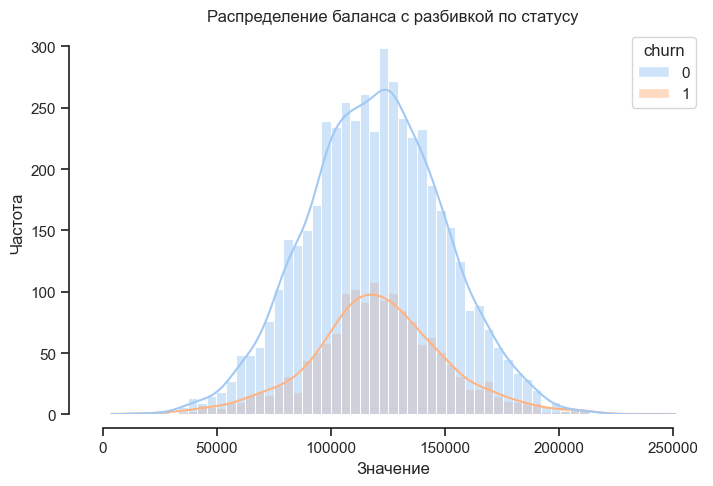

In [24]:
column_hist(bank_dataset, 'balance', 'churn',  'баланса с разбивкой по статусу')

Видим, что баланс распределен нормально. С пиком значений частоты в 100 000 - 150 000 (с пиком 50-100 клиентов из статуса "ушли" и до 300 в статуск текущих клиентов)  

### Распределение доходов с разбивкой по статусу оттока
Ответим на вопрос об распределении баланса клиентов. Распределение посмоторим на гистограмме. 


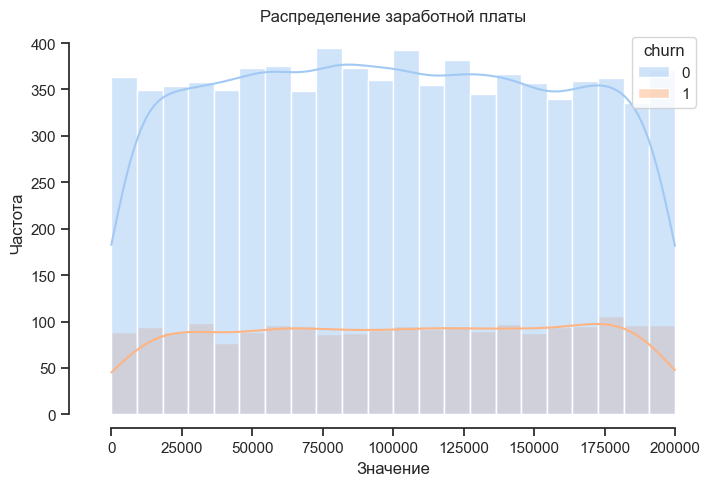

In [25]:
column_hist(bank_dataset, 'estimated_salary', 'churn',  'заработной платы')

Заработная плата распределена очень равномерно, без видимых пиков по обеим категориям.

### Распределение возраста с разбивкой по уходу
Ответим на вопрос об распределении баланса клиентов. Распределение посмоторим на гистограмме. 


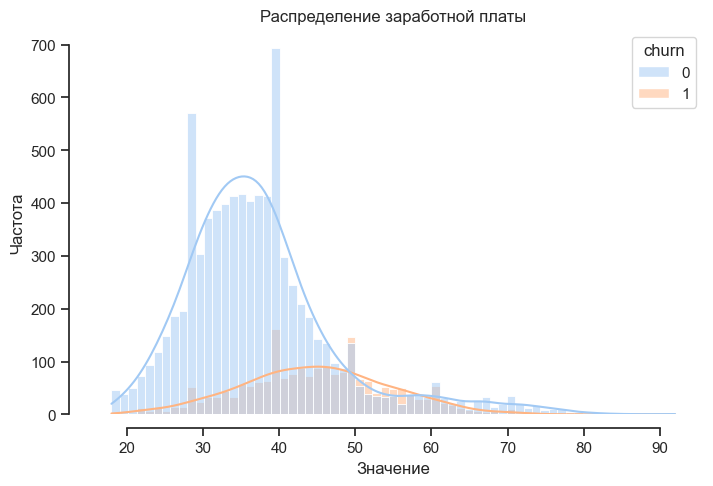

In [26]:
column_hist(bank_dataset, 'age', 'churn',  'заработной платы')

Возраст распределен нормально, с видимым пиком в районе 30, 40  и 50 лет для тех, кто остаётся и более мягким пиком в 45-55 лет для тех, кто уходит.
Выделяется десятки: возможно, это связано с коруглением.

### Зададим функцию построения коробчатой диаграммы


In [27]:
def balance_boxplot(df, hue1, hue2, hue1_name, hue2_name): #таблица, название колоннок я хью, название таблиц  
    sns.set_context('notebook')
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    # первый график
    sns.boxplot(data=df,  x = 'city', y='balance', hue=hue1, ax=axes[0]).set(
    xlabel=None,
    ylabel=None)
    axes[0].set_title('Распределение баланса по городу и по {}'.format(hue1_name))
    axes[0].legend(loc="upper right", title='{}'.format(hue1_name), title_fontsize=9)
    
    # второй график
    sns.boxplot(data=df, x = 'city', y='balance', hue=hue2, ax=axes[1]).set(
    xlabel=None,
    ylabel=None)
    axes[1].set_title('Распределение баланса по городу и по {}'.format(hue2_name))
    axes[1].legend(loc="upper right", title='{}'.format(hue2_name),title_fontsize=9)

# отображаем график на экране
plt.show()

### Диаграмма о среднем балансе в зависимости от города, гендера и статуса оттока


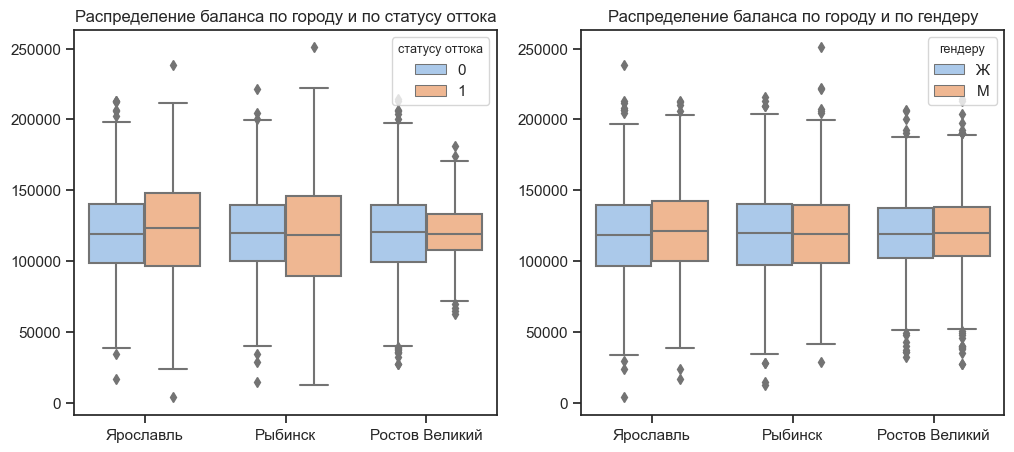

In [28]:
balance_boxplot(bank_dataset,'churn', 'gender', 'статусу оттока', 'гендеру')

Средний баланс незначительно отличается по городам, гендеру и статусу оттока - медиана в районе 120 тысяч рублей.

### Диаграмма о среднем балансе в зависимости от города, лояльности и наличие кредитной карты


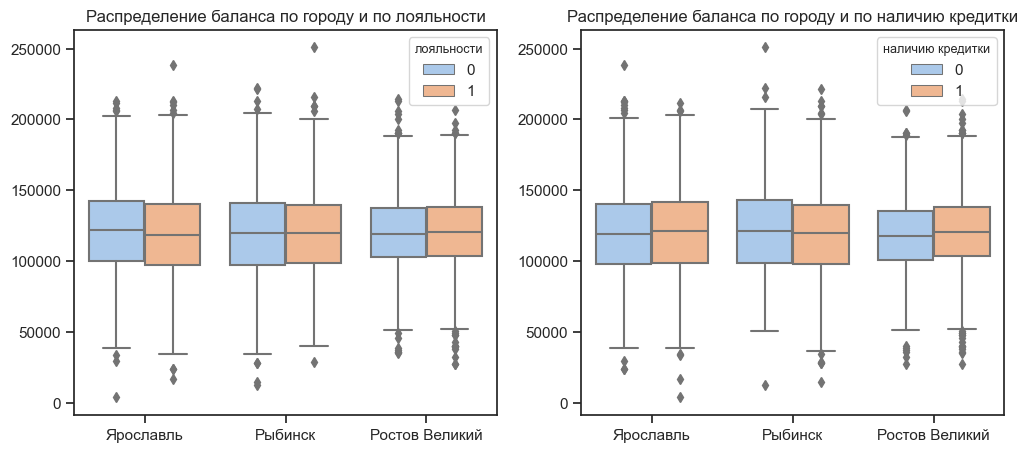

In [29]:
balance_boxplot(bank_dataset,'loyalty', 'credit_card', 'лояльности', 'наличию кредитки')

Средний баланс незначительно отличается по городам, лояльности и еналичию кредитной карты - медиана в районе 120 тысяч рублей.

Средний баланс незначительно отличается по городам, лояльности и еналичию кредитной карты - медиана в районе 120 тысяч рублей.

### Диаграмма количества клиентов в зависимости от числа используемых продуктов

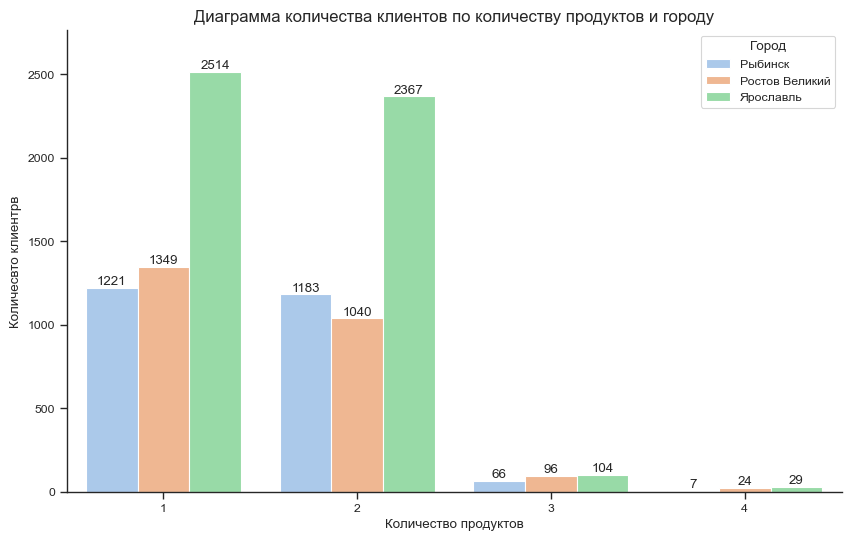

In [30]:

data_ed = bank_dataset.groupby(['products', 'city'], \
                        as_index = False)[['user_id']].nunique().sort_values(by = ['products','user_id'])
# строим раззмер графика
plt.figure(figsize=(10, 6))
sns.set_theme()
# устанавливаем стили
sns.set_style('ticks')
sns.set_context('paper')
sns.set_palette('pastel')
# строим график
ax = sns.barplot(y='user_id', x='products', data=data_ed, hue='city')
# добавим подписи
for bars in ax.containers:
        ax.bar_label(bars, fmt='%1.f')
#for i in range(data_ed.shape[0]):
#    os = [0,-0.33, 0.27 ,1, 0.66,1.27, 2, 1.66, 2.27, 3,2.66,3.27 ]
 #   ax.text(x = os[i],  y=data_ed.loc[i,'user_id'], s=data_ed.loc[i,'user_id'], ha='center', va='bottom')

plt.legend(loc="upper right", title="Город")

# убираем лишние линии
sns.despine()
# делаем отсуп и подписи
plt.margins(y=0.1)
plt.title(
    'Диаграмма количества клиентов по количеству продуктов и городу',
    fontsize=12)
plt.ylabel('Количесвто клиентрв')
plt.xlabel('Количество продуктов')
plt.xticks(rotation=0)
# отображаем график на экране
plt.show()

Больше всего клиентов находятся в городе Ярославле. При этом больше наиболее популярный портетр клиента - 1 ии 2 продукта, распределение очень похоже между разными городами. 

### Зададим функцию построения стобчатой диаграммы


In [31]:
def column_barchart( col, name):
    data_ch = bank_dataset.groupby([col, 'churn'], \
                        as_index = False)[['user_id']].nunique().sort_values(by = [col, 'user_id'],ascending=False)
# строим раззмер графика
    plt.figure(figsize=(8, 5))
    sns.set_theme()

# устанавливаем стили
    sns.set_style('ticks')
    sns.set_context('paper')
    sns.set_palette('pastel')

# строим график
    ax =sns.barplot(x='user_id',y= data_ch[col], data=data_ch, hue ='churn',dodge=False)
    for bars in ax.containers:
            ax.bar_label(bars, fmt='%1.f')

# добавим подписи
    plt.legend( title="Cтатус оттока")

# убираем лишние линии
#sns.despine()

# делаем отсуп и подписи
    plt.margins(y=0.1)
    plt.title(
    'Диаграмма количества клиентов -  {} и статус оттока'.format(name),
    fontsize=12)
    plt.xlabel('количество клиентов')
    plt.ylabel('{}'.format(name))
    plt.xticks(rotation=0)

# отображаем график на экране
    plt.show()

### Диаграмма количества клиентов в зависимости от числа используемых продуктов

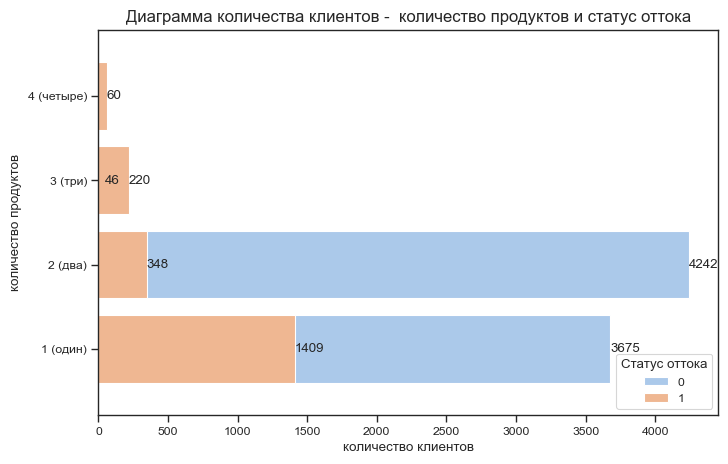

In [32]:
bank_dataset['products_num']= bank_dataset['products']
mapping = {1: '1 (один)', 2: '2 (два)', 3: '3 (три)', 4: '4 (четыре)'}
bank_dataset['products_num'] = bank_dataset['products_num'].map(mapping)
column_barchart( 'products_num', 'количество продуктов')

Больше всего клиентов находятся в категории тех, у кого 1 или 2 продукта - при этом наибольший отток в категории одного продукта (1409), по проценту - наибольший отток в категории 3 и 4. 

Большая часть клиентов из этих категории уходят, в категории 4 продукта не остаётся клиентов.

### Диаграмма количества клиентов в зависимости от города

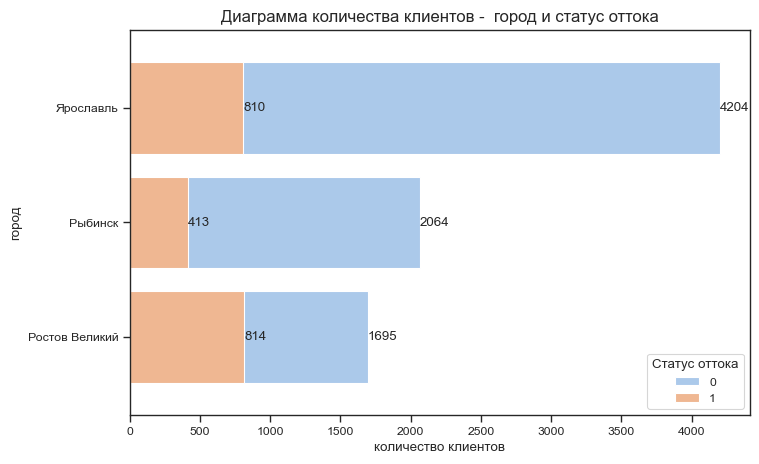

In [33]:
column_barchart( 'city', 'город')

Больше всего клиентов находятся в Ярославле. 

При этом отток - самый большой в ростове великом (по проценту).

### Диаграмма количества клиентов в зависимости от возрастной группы

In [34]:
a = [0,10, 30, 50, 70,  90, 100]
percentiles = np.percentile(bank_dataset['age'],a)
percentiles

array([18., 27., 33., 37., 42., 53., 92.])

Разобьём клиентов на категории по возрасту в соответсвии с процентилями:
 -    18 - 26, 
 -    27 - 32,
 -    33 - 36,
 -    37 - 41,
 -    42 - 52,
 -  53 - 92.
 
  

In [35]:
labels = [ '18-26', '27-32', '33-36', '37-41', '42-52','53-92']
bank_dataset['age_group'] = pd.cut(bank_dataset['age'], bins=percentiles, labels=labels, right=False)

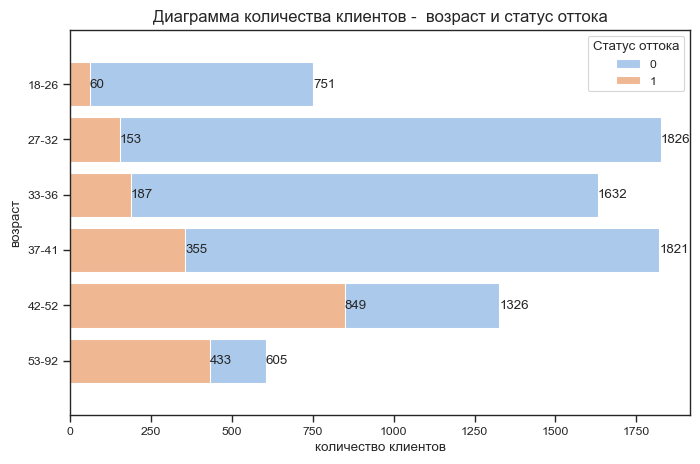

In [36]:
column_barchart( 'age_group', 'возраст')

Больше всего оттока клиентов в категории свыше 42.

### Диаграмма количества клиентов в зависимости от города

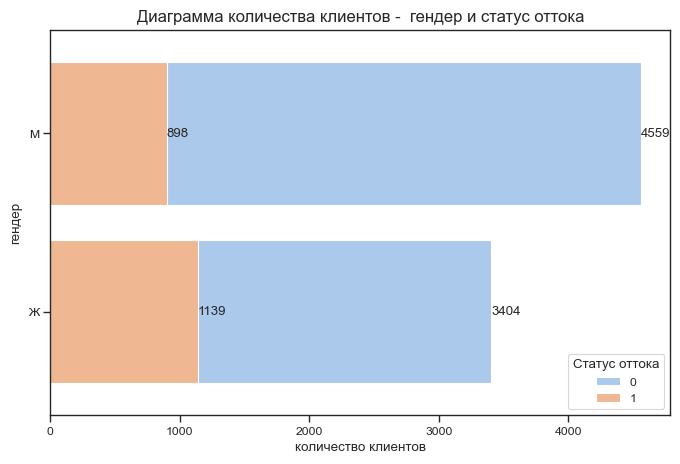

In [37]:
column_barchart( 'gender', 'гендер')

Видим, что отток у женщин выше, чем отток у мужчин.

### Диаграмма количества клиентов в зависимости от города

In [38]:
city_dummies = pd.get_dummies(bank_dataset['city'], prefix='is')
bank_dataset = pd.concat([bank_dataset, city_dummies], axis=1)
bank_dataset

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,...,nan_balance,is_w,city_num,age_gr,salary_group,products_num,age_group,is_Ростов Великий,is_Рыбинск,is_Ярославль
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,...,1,1,0,3,3,1 (один),42-52,0,0,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,...,0,1,1,3,3,1 (один),37-41,0,1,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,...,0,1,0,3,3,3 (три),42-52,0,0,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,...,1,1,0,3,2,2 (два),37-41,0,0,1
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,...,0,1,1,3,2,1 (один),42-52,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,...,1,0,0,3,2,2 (два),37-41,0,0,1
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,...,0,0,0,2,3,1 (один),33-36,0,0,1
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,...,1,1,0,2,1,1 (один),33-36,0,0,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,...,0,0,2,3,2,2 (два),42-52,1,0,0


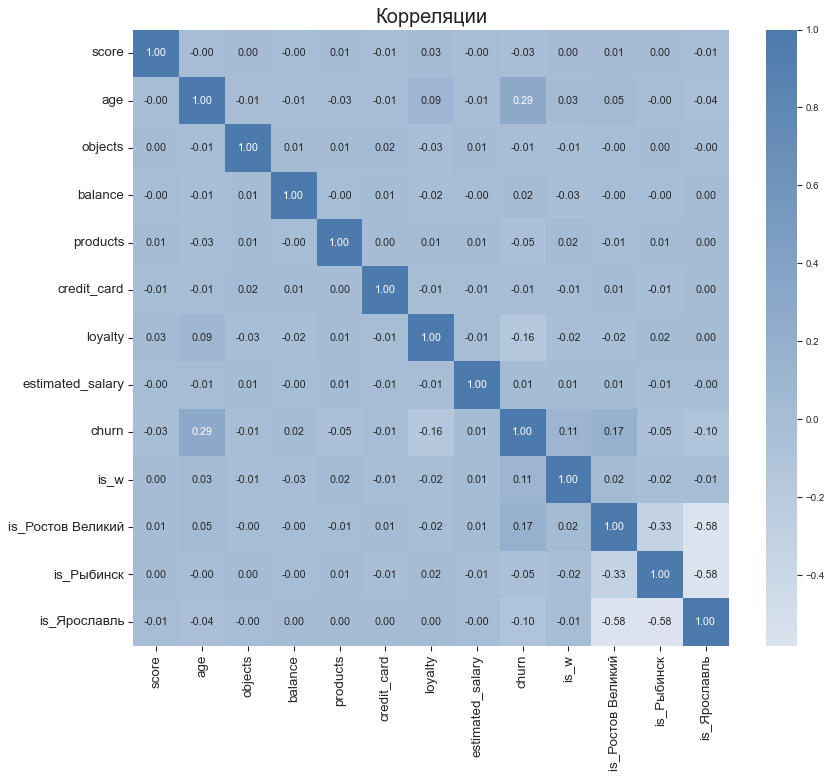

In [39]:
df = bank_dataset[['score','city', 'age', 'objects', 'balance','products', 'credit_card',
                    'loyalty', 'estimated_salary', 'churn','is_w', 'is_Ростов Великий','is_Рыбинск', 'is_Ярославль']]
plt.figure(figsize=(12,10), dpi= 80)
# строим раззмер графика
sns.set_theme()
# устанавливаем стили
sns.set_style('ticks')
sns.set_context('paper')


numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, cmap=sns.color_palette("blend:#ffffff,#4d7aac", as_cmap=True),
yticklabels=corr_matrix.columns, center=0, annot=True, fmt=".2f")

# Decorations
plt.title('Корреляции', fontsize=18)
plt.xticks(fontsize=12, rotation =90)
plt.yticks(fontsize=12, rotation =0)
plt.show()

Видим, что корреляция довольно высока с возрастом.

### Краткий вывод


Видим, что баланс распределен нормально. С пиком значений частоты в 100 000 - 150 000 (с пиком 50-100 клиентов из статуса "ушли" и до 300 в статуск текущих клиентов).
Заработная плата распределена очень равномерно, без видимых пиков по обеим категориям.
Средний баланс незначительно отличается по городам, гендеру и статусу оттока - медиана в районе 120 тысяч рублей.
Средний баланс незначительно отличается по городам, лояльности и еналичию кредитной карты - медиана в районе 120 тысяч рублей.
Больше всего клиентов находятся в городе Ярославле. При этом больше наиболее популярный портетр клиента - 1 ии 2 продукта, распределение очень похоже между разными городами. 

Больше всего клиентов находятся в категории тех, у кого 1 или 2 продукта - при этом наибольший отток в категории одного продукта (1409), по проценту - наибольший отток в категории 3 и 4. 
Большая часть клиентов из этой категории уходят, в категории 4 продукта не остаётся клиентов.
Больше всего клиентов находятся в Ярославле. 

При этом отток - самый большой в ростове великом (по проценту).
Больше всего оттока клиентов в категории свыше 42.
отток у женщин выше, чем отток мужчин

##  Сегментация клиентов банка

Проведем сегментацию клиентов банка в основные 4 или менее категорий на основе количества используемых продуктов и уровню оттока. 

При разбивки только по продуктоу получаес 4 кластера. Однако при добавлении други индикаторов, как, например, возраст, мы видим, что количество кластеров - 3 илли даже 2.

### Оценка оптимального числа кластеров

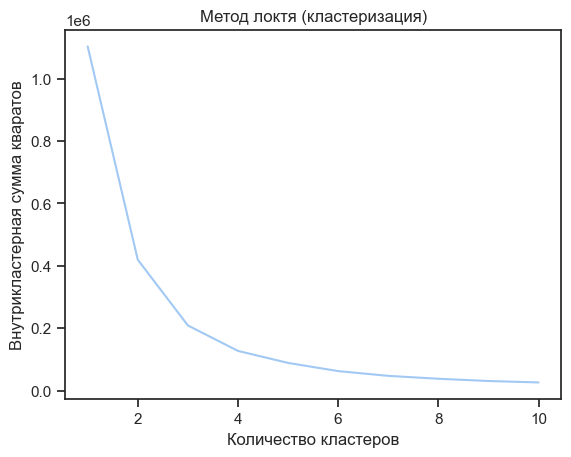

In [40]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(bank_dataset[['products', 'age']])
    wcss.append(kmeans.inertia_)
    sns.set_theme()
# устанавливаем стили
sns.set_style('ticks')

sns.set_palette('pastel')
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя (кластеризация)')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерная сумма кваратов')
plt.show()


Оптимальное число кластеров - 3 (или 4) кластера. Посмотьрим по другому методу.

In [41]:
X = bank_dataset[['products','age']]
   
for n_cluster in range(2, 7):
    kmeans = KMeans(n_clusters=n_cluster, n_init=10).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("Для количества кластеров {}, оценка силуэта {}".format(n_cluster, sil_coeff))


Для количества кластеров 2, оценка силуэта 0.579109815101214
Для количества кластеров 3, оценка силуэта 0.534836164483973
Для количества кластеров 4, оценка силуэта 0.5221648062664079
Для количества кластеров 5, оценка силуэта 0.506976688590157
Для количества кластеров 6, оценка силуэта 0.5065594164723901


Наибольший коэффициент - у разбивки по двум кластерам. 
Постараемся сделать разбивку по 3 кластерам. 

### Разбивка по числу продуктов

Разобьем на кластеры по числу продуктов.

In [42]:
# число кластеров = 3
kmeans = KMeans(n_clusters=3, n_init=10)

# применим KMeans к данным
kmeans.fit( bank_dataset[['products']])

# лейблы для кластеров
labels = kmeans.labels_

bank_dataset['cluster_products'] = labels


In [43]:
for i in range(0, 3):
    print(
        'В кластере {} содержатся клиенты с количеством продуктов {}.'.format(
            i,
            bank_dataset[bank_dataset['cluster_products'] == i]['products'].unique()))

В кластере 0 содержатся клиенты с количеством продуктов [1].
В кластере 1 содержатся клиенты с количеством продуктов [3 4].
В кластере 2 содержатся клиенты с количеством продуктов [2].


В кластер с разбивкой по продуктам попадают клиенты по трём категориям: 
- 0 кластер - 1 продукт,
- 1 кластер - 2 продукта,
- 3 кластер - 3 продукта.

Посмотртим на характеристики сегментов.

In [44]:
cluster = bank_dataset.groupby('cluster_products').agg({
    'user_id': 'nunique',
    'age': 'median',
    'is_w': 'sum',
    'credit_card': 'sum',
    'churn': 'sum',
    'products': 'median'
}).reset_index()
cluster['%W'] =round(100*cluster ['is_w'] /cluster ['user_id'],1)
cluster['%churn'] =round(100*cluster ['churn'] /cluster ['user_id'],1)
cluster

,cluster_products,user_id,age,is_w,credit_card,churn,products,%W,%churn
0,0,5084,38.0,2296,3578,1409,1.0,45.2,27.7
1,1,326,43.0,187,231,280,3.0,57.4,85.9
2,2,4590,36.0,2060,3246,348,2.0,44.9,7.6


Разбивка по кластерам неравномерна, в 0 и 1 кластере - значительно большее количество клиентов, чем в кластере 2. 

В кластерах примерно одинаковое количество распределения по гендерному признаку, немного больше в кластрее 2. 
45% для кластера 0 и 1, 57% для кластера 2.
Отток значительно больше у кластера 2. - 85 %, у кластера 0 и 1 показатель - соответственно 27 и 8%.

### Разбивка по возрасту

Разобьем на кластеры по возрасту.

In [45]:
# число кластеров = 2
kmeans = KMeans(n_clusters=2, n_init=10)

# применим KMeans к данным
kmeans.fit( bank_dataset[['age']])

# лейблы для кластеров
labels = kmeans.labels_

bank_dataset['cluster_age'] = labels


In [46]:
for i in range(0, 2):
    print(
        'В кластере {} содержатся клиенты с возрастом {}.'.format(
            i,
            bank_dataset[bank_dataset['cluster_age'] == i]['age'].sort_values().unique()))
    

В кластере 0 содержатся клиенты с возрастом [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 88 92].
В кластере 1 содержатся клиенты с возрастом [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42].


В кластер с разбивкой по продуктам попадают клиенты по трём категориям: 
- 0 кластер - 44 - 92 года,
- 1 кластер - 18 - 43 года,


Посмотртим на характеристики сегментов.

In [47]:
cluster = bank_dataset.groupby('cluster_age').agg({
    'user_id': 'nunique',
    'age': 'median',
    'is_w': 'sum',
    'credit_card': 'sum',
    'churn': 'sum',
    'products': 'median'
}).reset_index()
cluster['%W'] =round(100*cluster ['is_w'] /cluster ['user_id'],1)
cluster['%churn'] =round(100*cluster ['churn'] /cluster ['user_id'],1)

cluster

,cluster_age,user_id,age,is_w,credit_card,churn,products,%W,%churn
0,0,2894,49.0,1393,2009,1205,1.0,48.1,41.6
1,1,7106,34.0,3150,5046,832,2.0,44.3,11.7


Разбивка по кластерам по возрасту на два кластера также неравномерна, в 1 кластере (до 43 лет включительно) - в 3 раза большее количество клиентов, чем в кластере 0 (старше 44 включительно). 

В кластерах примерно одинаковое количество распределения по гендерному признаку, немного больше в кластрее 0. 
49% для кластера 0 , 44% для кластера 1.
Отток значительно больше у кластера 0 - 43 %, у кластера  1 показатель - 12%.

### Разбивка по продуктам и  возрасту

Сделаем смешанную таблицу по ддвум группам кластеров.

In [48]:
cluster = bank_dataset.groupby(['cluster_products','cluster_age']).agg({
    'user_id': 'nunique',
    'age': 'median',
    'is_w': 'sum',
    'credit_card': 'sum',
    'churn': 'sum',
    'products': 'median'
}).reset_index()
cluster['%W'] =round(100*cluster ['is_w'] /cluster ['user_id'],1)
cluster['%churn'] =round(100*cluster ['churn'] /cluster ['user_id'],1)
cluster['%credit_card'] =round(100*cluster ['credit_card'] /cluster ['user_id'],1)
cluster

,cluster_products,cluster_age,user_id,age,is_w,credit_card,churn,products,%W,%churn,%credit_card
0,0,0,1648,49.0,787,1136,847,1.0,47.8,51.4,68.9
1,0,1,3436,34.0,1509,2442,562,1.0,43.9,16.4,71.1
2,1,0,166,50.0,99,115,161,3.0,59.6,97.0,69.3
3,1,1,160,37.0,88,116,119,3.0,55.0,74.4,72.5
4,2,0,1080,48.0,507,758,197,2.0,46.9,18.2,70.2
5,2,1,3510,34.0,1553,2488,151,2.0,44.2,4.3,70.9


In [49]:
bank_dataset['cluster'] = bank_dataset['cluster_age']
bank_dataset.loc[bank_dataset['cluster_products'] == 2, 'cluster'] = 2 


In [50]:
for i in range(0, 3):
    print(
        'В кластере {} содержатся клиенты с возрастом {} и продуктами {}.'.format(
            i,
            bank_dataset[bank_dataset['cluster'] == i]['age'].sort_values().unique(),
            bank_dataset[bank_dataset['cluster'] == i]['products'].sort_values().unique()))
    

В кластере 0 содержатся клиенты с возрастом [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 83 84 92] и продуктами [1 3 4].
В кластере 1 содержатся клиенты с возрастом [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42] и продуктами [1 3 4].
В кластере 2 содержатся клиенты с возрастом [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 85 88 92] и продуктами [2].


In [51]:
cluster = bank_dataset.groupby('cluster').agg({
    'user_id': 'nunique',
    'age': 'median',
    'is_w': 'sum',
    'credit_card': 'sum',
    'churn': 'sum',
    'products': 'median',
    'objects': 'median',
    'estimated_salary':'median',
    'balance':'median'
}).reset_index()
cluster['%W'] =round(100*cluster ['is_w'] /cluster ['user_id'],1)
cluster['%churn'] =round(100*cluster ['churn'] /cluster ['user_id'],1)
cluster['%credit_card'] =round(100*cluster ['credit_card'] /cluster ['user_id'],1)

cluster

,cluster,user_id,age,is_w,credit_card,churn,products,objects,estimated_salary,balance,%W,%churn,%credit_card
0,0,1814,50.0,886,1251,1008,1.0,5.0,96945.120,119852.010,48.8,55.6,69.0
1,1,3596,34.0,1597,2558,681,1.0,5.0,100582.895,119966.080,44.4,18.9,71.1
2,2,4590,36.0,2060,3246,348,2.0,5.0,100738.855,119762.245,44.9,7.6,70.7


Отличия по 3м сегментам:

- 0 -  клиенты с 1 или 2 продуктами до 43 лет включительно,
- 1 -клиенты с 1 или 2 продуктами старше 44 лет включительно
- 2 -  клиенты с количеством продуктов более 2. 
Разница в оттоке между группами клиентов - самый низкий в группе с 1 или 2 продуктами до 43 лет включительно, 11%.
Далее, группа с с 1 или 2 продуктами старше 44 лет включительно, 40%.
И самый высокий процент оттока - у группы с количеством продуктов более 2, 86%. Тем не менее, эта группа малочисленная. 

### Краткий вывод
Из различий в проценте оттока разных клиентов можо предложить разбивку по 3м сегментам:

- 0 -  клиенты с 1 или 2 продуктами до 43 лет включительно,
- 1 - клиенты с 1 или 2 продуктами старше 44 лет включительно
- 2 -  клиенты с количеством продуктов более 2. 
Разница в оттоке между группами клиентов - самый низкий в группе с 1 или 2 продуктами до 43 лет включительно, 11%.
Далее, группа с с 1 или 2 продуктами старше 44 лет включительно, 40%.
И самый высокий процент оттока - у группы с количеством продуктов более 2, 86%. Тем не менее, эта группа малочисленная. 

##   Статистическое исследование данных

Применение статистических методов для дальнейшего изучения и проверки сегментов, полученных на этапе сегментации.


### Гипотеза различия дохода между сегментом c 1 и 2 продуктами
Проверка гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.


Сформулируем гипотезы.
- **Н0:** Нулевая гипотеза - различий в распределении дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, нет. 
- **Н1:** Альтернативная гипотеза -  различия в распределении доходе между группами есть.

Уровень alpha устанавливаем как `0.05`, проверяем гипотезы  критерием «U-критерий Манна-Уитни».

In [52]:
alpha = 0.05 
sampleA = bank_dataset[bank_dataset['products'] == 1]['estimated_salary']
sampleB= bank_dataset[bank_dataset['products'] == 2]['estimated_salary']
result = stats.mannwhitneyu(sampleA,sampleB)[1]

print('p-value:', "{0:.2f}".format(result))
if (result < alpha):
    print('Отвергаем нулевую гипотезу. Распределение дохода клиентов 0 кластера отличается от дохода 1 кластера')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Распределение дохода клиентов 0 кластера не отличается от распределения дохода 1 кластера.')

print('Pазличиe в среднем доходе между группами:',"{0:.4f}".format(sampleB.mean()/sampleA.mean()-1))


p-value: 0.41
Не получилось отвергнуть нулевую гипотезу. Распределение дохода клиентов 0 кластера не отличается от распределения дохода 1 кластера.
Pазличиe в среднем доходе между группами: 0.0097


Не получилось отвергнуть нулевую гипотезу. p-value: 0.41 Распределение дохода клиентов 0 кластера с 1 продуком не отличается от дохода 1 кластера с 2мя продуктами, при этом различия в среднем доходе между группами минимально: 0.0097. Не можем говорить о том, что есть различия.

### Гипотеза различия баланса между сегментом c 1 и 2 продуктами

Проверка гипотезу различия баланса между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.


Сформулируем гипотезы.
- **Н0:** Нулевая гипотеза - различий в распределении баланса между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, нет. 
- **Н1:** Альтернативная гипотеза -  различия в распределении баласна между группами есть.

Уровень alpha устанавливаем как `0.05`, проверяем гипотезы  критерием «U-критерий Манна-Уитни».

In [53]:
alpha = 0.05 
sampleA = bank_dataset[(~bank_dataset['balance'].isna())&(bank_dataset['products'] == 1)]['balance']
sampleB = bank_dataset[(~bank_dataset['balance'].isna())&(bank_dataset['products'] == 2)]['balance']
result = stats.mannwhitneyu(sampleA,sampleB)[1]

print('p-value:', "{0:.2f}".format(result))
if (result < alpha):
    print('Отвергаем нулевую гипотезу. Распределение баланса клиентов 0 кластера отличается от баланса 1 кластера')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Распределение баланса клиентов 0 кластера не отличается от баланса 1 кластера')

print('Pазличиe в среднем доходе между группами:',"{0:.4f}".format(sampleB.mean()/sampleA.mean()-1))


p-value: 0.62
Не получилось отвергнуть нулевую гипотезу. Распределение баланса клиентов 0 кластера не отличается от баланса 1 кластера
Pазличиe в среднем доходе между группами: -0.0019


Не получилось отвергнуть нулевую гипотезу. 
p-value: 0.62
 Распределение баланса клиентов 0 кластера не отличается от баланса 1 кластера
Pазличиe в среднем доходе между группами: -0.0019

### Предложения по новым продуктам

Категория 0 -  клиенты с 1 или 2 продуктами до 43 лет включительно:

1. «Метанпром» Top Savings  - накопительный счёт с высоким процентом
2. «Метанпром» Refinance  - Рефинансирование студенческого кредита
3. «Метанпром» Bonus - карта с бонусной программой  


Категория 1 - клиенты с 1 или 2 продуктами старше 44 лет включительно:

1. «Метанпром» Confidence  - cтрахование на случай длительного ухода
2. «Метанпром» Capital  - платформа для онлайн-торговли акциями и портфель ETF
3. «Метанпром» Home Insurance  - страхование недвижимости


Категория 2 -  клиенты с количеством продуктов более 2:


1. «Метанпром» Private - услуги по управлению активами. Консультация и индивидуальный план управдения активами. 
2. «Метанпром» Mobile - удобный интерфейс управления активами 
3. «Метанпром» Страхование вкладов - возможность страховать свои активы от рисков 


### Краткий вывод


Не получается  гипотезу о разнице дохода или баланса между клиентами с 1 и 2мя продуктами. Видим, что разница между этими клиенами с точки зрения баланса и заработной платы не значима статистически.

Формулируем предложения по новым продуктам:


`Категория 0 -  клиенты с 1 или 2 продуктами до 43 лет включительно:`

1. «Метанпром» Top Savings  - накопительный счёт с высоким процентом
2. «Метанпром» Refinance  - Рефинансирование студенческого кредита
3. «Метанпром» Bonus - карта с бонусной программой  


`Категория 1 - клиенты с 1 или 2 продуктами старше 44 лет включительно:`

1. «Метанпром» Confidence  - cтрахование на случай длительного ухода
2. «Метанпром» Capital  - платформа для онлайн-торговли акциями и портфель ETF
3. «Метанпром» Home Insurance  - страхование недвижимости


`Категория 2 -  клиенты с количеством продуктов более 2:`


1. «Метанпром» Private - услуги по управлению активами. Консультация и индивидуальный план управдения активами. 
2. «Метанпром» Mobile - удобный интерфейс управления активами 
3. «Метанпром» Страхование вкладов - возможность страховать свои активы от рисков


`Дополнительная рекомендация:`
Количество пользователей с оценкой зарплаты меньше МРОТ в таблице: 802. Дополнительная рекомендация - откалибровать метод оценки клиента. Возможно из-зп неверной оценки клиент получает низкий рейтинг и с большей вероятностью уходит.


<a id='section_id'></a>


##   Подготовка презентации

Построение дашборда.


Дашборд: <https://public.tableau.com/views/Metanprom_16752050184820/MetanpromDash?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link> 


Подготовка презентации.

Презентация: <https://pitch.com/public/3e35f09d-7263-4e73-944f-b5f4e92a974c> 


## Вывод


Столбцы  `userid`,  `score`, `Age`, `Objects`, `Products` — хранят информацию количественного характера, записаны как `int`. 

Столбцы `City`и `Gender` — хранят информацию качественного характера, записаны как `object`. 

Не у всех заведений указаны рабочие часы.
 
Столбцы `Balance` и `estimated_salary` - сумма денег, хранятся в формате `float`. Первый параметр есть у большей части строк (**6 383**) , второй - у всех строк.

Столбцы `CreditCard`, `Loyalty`,  `Churn` - записаны как `int`, принимают значения **0** и **1**. 

Видим в таблице **10 000** записей до выделения дубликатов (пропусков).

Стобец `score` — принимает значения от **350** до **850**. 

Стобец `City` — название города, значения - 'Ярославль' 'Рыбинск' 'Ростов Великий'.

Стобец `Gender` — пол принимает значения 'Ж' 'М'.

Стобец `Age` — возраст - от **18** до **92**.

Стобец `Objects` — количество объектов в собственности, минимальное значение - **0**, максимальное значение - **10**.

Стобец `Balance` — баланс на счёте, от **3 768** до **250 898**.

Стобец `Products` — количество продуктов, которыми пользуется клиент, от **1** до **4**. 

Стобец `estimated_salary` — заработная плата, от **11** до **199 992**.

В таблице нет явных дубликатов.
Столбец с оценкой заработной платы содержат значения заработной платы для всех категорий клиентов, при этом есть странные значения.

Количество пользователей с оценкой зарплаты меньше МРОТ: 802

Количество пользователей с оценкой зарплаты меньше 1000: 59


Количество пользователей с оценкой зарплаты меньше 100: 4


Пропуски есть только в стоблце `balance` - этот параметр есть у большей части строк (6 383 из 10 000).
Корреляции для столбца обозначения пустого баланса указывает, что нужно обратить внимание на город, продукты, показатель того, остался пользователь или нет.

Доля пропусков для столбцов - город, продукты, показатель того, остался пользователь или нет - показывают, что наиболее часто пропуски  Больше всего пропусков в Рыбинске и Ярославле, у клиентов с 2-мя и 3-мя продуктами, у клиентов, которые остались клиентами банка.


Баланс распределен нормально. С пиком значений частоты в 100 000 - 150 000 (с пиком 50-100 клиентов из статуса "ушли" и до 300 в статуск текущих клиентов).
Заработная плата распределена очень равномерно, без видимых пиков по обеим категориям.
Средний баланс незначительно отличается по городам, гендеру и статусу оттока - медиана в районе 120 тысяч рублей.
Средний баланс незначительно отличается по городам, лояльности и еналичию кредитной карты - медиана в районе 120 тысяч рублей.
Больше всего клиентов находятся в городе Ярославле. При этом больше наиболее популярный портетр клиента - 1 ии 2 продукта, распределение очень похоже между разными городами. 

Больше всего клиентов находятся в категории тех, у кого 1 или 2 продукта - при этом наибольший отток в категории одного продукта (1409), по проценту - наибольший отток в категории 3 и 4. 
Большая часть клиентов из этой категории уходят, в категории 4 продукта не остаётся клиентов.
Больше всего клиентов находятся в Ярославле. 

При этом отток - самый большой в ростове великом (по проценту).
Больше всего оттока клиентов в категории свыше 42.
отток у женщин выше, чем отток мужчин.

Из различий в проценте оттока разных клиентов можо предложить разбивку по 3м сегментам:

- 0 -  клиенты с 1 или 2 продуктами до 43 лет включительно,
- 1 - клиенты с 1 или 2 продуктами старше 44 лет включительно
- 2 -  клиенты с количеством продуктов более 2. 
Разница в оттоке между группами клиентов - самый низкий в группе с 1 или 2 продуктами до 43 лет включительно, 11%.
Далее, группа с с 1 или 2 продуктами старше 44 лет включительно, 40%.
И самый высокий процент оттока - у группы с количеством продуктов более 2, 86%. Тем не менее, эта группа малочисленная. 

Не получается  гипотезу о разнице дохода или баланса между клиентами с 1 и 2мя продуктами. Видим, что разница между этими клиенами с точки зрения баланса и заработной платы не значима статистически.

Формулируем предложения по новым продуктам:


`Категория 0 -  клиенты с 1 или 2 продуктами до 43 лет включительно:`

1. «Метанпром» Top Savings  - накопительный счёт с высоким процентом
2. «Метанпром» Refinance  - Рефинансирование студенческого кредита
3. «Метанпром» Bonus - карта с бонусной программой  


`Категория 1 - клиенты с 1 или 2 продуктами старше 44 лет включительно:`

1. «Метанпром» Confidence  - cтрахование на случай длительного ухода
2. «Метанпром» Capital  - платформа для онлайн-торговли акциями и портфель ETF
3. «Метанпром» Home Insurance  - страхование недвижимости


`Категория 2 -  клиенты с количеством продуктов более 2:`


1. «Метанпром» Private - услуги по управлению активами. Консультация и индивидуальный план управдения активами. 
2. «Метанпром» Mobile - удобный интерфейс управления активами 
3. «Метанпром» Страхование вкладов - возможность страховать свои активы от рисков 
